In [2]:
# import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots to be created 

# read in the data

df = pd.read_csv('/Users/danielduque/Downloads/movies.csv')

# Let's look at the data

df = df.dropna()

df.head()


name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [3]:
# Let's see if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [4]:
# Data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
# Change data type of columns 

df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int) 

# Separate released into two columns 

df[['released','country_release']] = df['released'].str.split(' \(',n=1,expand=True) 


In [19]:
# Change display options to show all rows 

pd.set_option('display.max_rows', None)

# Sort movies by highest gross revenue 

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

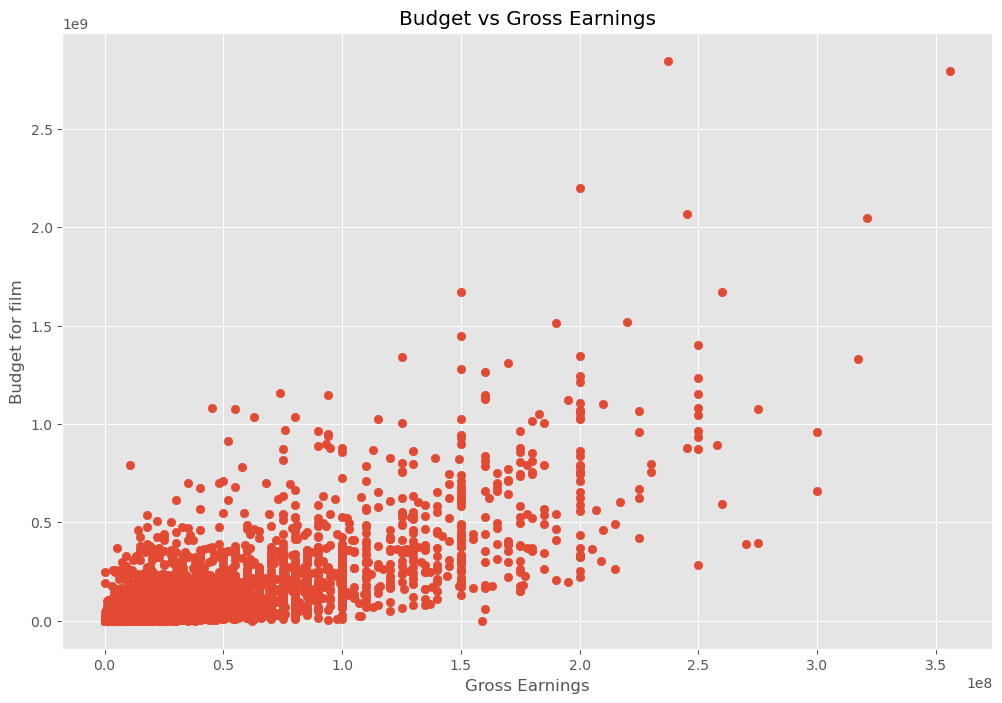

In [21]:
# Scatter plot with budget vs gross revenue

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')
plt.ylabel('Budget for film')

plt.show()

In [20]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

               released  score      votes       director              writer  \
5445  December 18, 2009    7.8  1100000.0  James Cameron       James Cameron   
7445     April 26, 2019    8.4   903000.0  Anthony Russo  Christopher Markus   
3045  December 19, 1997    7.8  1100000.0  James Cameron       James Cameron   
6663  December 18, 2015    7.8   876000.0    J.J. Abrams     Lawrence Kasdan   
7244     April 27, 2018    8.4   897000.0  Anthony Russo  Christopher Markus   

                   star        country     budget       gross  \
5445    Sam Worthington  United States  237000000  2847246203   
7445  Robert Downey Jr.  United States  356000000  2797501328   
3045  Leonardo DiCaprio  United States  200000000  2201647264   
6663       Daisy Ridley  United States  245000000  2069521700   
7244  Robert Downey Jr.  United States  321000000  2048359754   

                    company  runtime country_release  
5445  Twentieth Century Fox    162.0  United States)  
7445         Marvel Studios    181.0  United States)  
3045  Twentieth Century Fox    194.0  United States)  
6663              Lucasfilm    138.0  United States)  
7244         Marvel Studios    149.0  United States)

<AxesSubplot:xlabel='budget', ylabel='gross'>

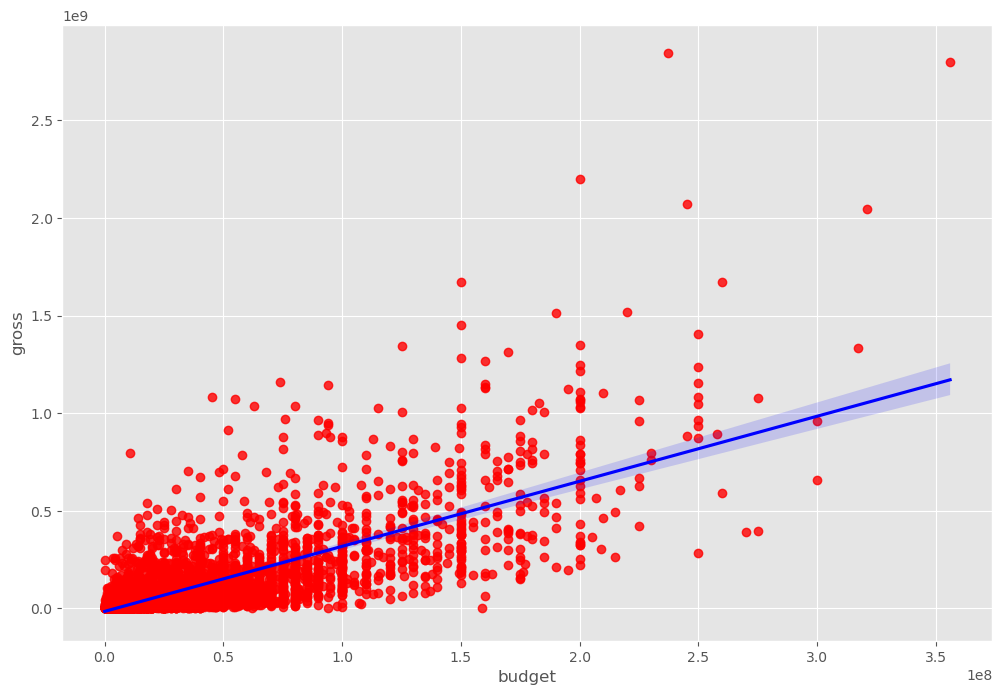

In [24]:
# plot budget vs gross using seaborn 

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [28]:
# Let's start looking at correlation 

df.corr(method='pearson')

year     score     votes    budget     gross   runtime
year     1.000000  0.056386  0.206021  0.327722  0.274321  0.075077
score    0.056386  1.000000  0.474256  0.072001  0.222556  0.414068
votes    0.206021  0.474256  1.000000  0.439675  0.614751  0.352303
budget   0.327722  0.072001  0.439675  1.000000  0.740247  0.318695
gross    0.274321  0.222556  0.614751  0.740247  1.000000  0.275796
runtime  0.075077  0.414068  0.352303  0.318695  0.275796  1.000000

<function matplotlib.pyplot.show(close=None, block=None)>

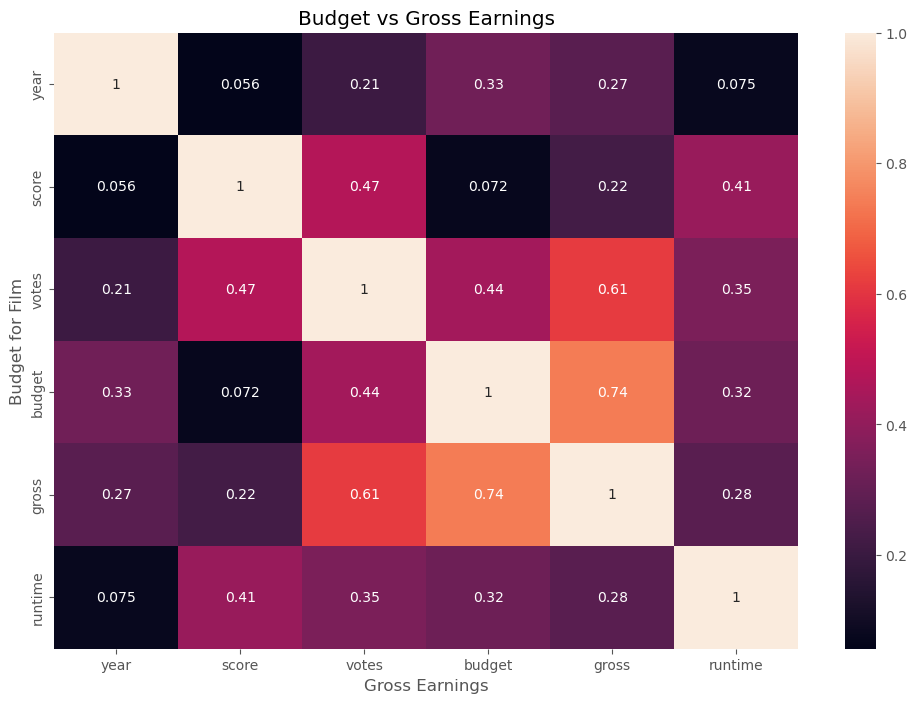

In [31]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')

plt.show

In [32]:
df_stringtoint = df

for col_name in df_stringtoint.columns:
    if(df_stringtoint[col_name].dtype == 'object'):
        df_stringtoint[col_name] = df_stringtoint[col_name].astype('category')
        df_stringtoint[col_name] = df_stringtoint[col_name].cat.codes
        
df_stringtoint

name  rating  genre  year  released  score      votes  director  writer  \
5445   386       5      0  2009       496    7.8  1100000.0       785    1263   
7445   388       5      0  2019       124    8.4   903000.0       105     513   
3045  4909       5      6  1997       502    7.8  1100000.0       785    1263   
6663  3643       5      0  2015       498    7.8   876000.0       768    1806   
7244   389       5      0  2018       132    8.4   897000.0       105     513   
7480  4388       4      2  2019      1064    6.9   222000.0      1012    1361   
6653  2117       5      0  2015      1238    7.0   593000.0       335    2523   
6043  3878       5      0  2012      1792    8.0  1300000.0      1060    1646   
6646  1541       5      0  2015       151    7.1   370000.0       809     481   
7494  1530       4      2  2019      1929    6.8   148000.0       277    1383   
6644   387       5      0  2015      1619    7.3   777000.0      1060    1646   
7247   567       5      0  2018       685    7.3   661000.0      1716    2687   
5845  1731       5      1  2011      1031    8.1   790000.0       452    2862   
7075  3644       5      0  2017       471    7.0   581000.0      1589    2487   
7271  2118       5      0  2018      1310    6.2   277000.0       764     777   
6262  1529       4      2  2013      1958    7.4   585000.0       277    1383   
7072   477       4      7  2017      1475    7.1   283000.0       155    2822   
7281  1966       4      2  2018      1258    7.6   263000.0       193     327   
7055  4119       5      0  2017        40    6.6   214000.0       567    1013   
6244  2014       5      0  2013      1775    7.1   779000.0      1767     837   
6688  2545       4      2  2015       993    6.4   218000.0      1144     362   
6846   750       5      0  2016      1803    7.8   694000.0       105     513   
7250   343       5      0  2018       532    6.9   404000.0       809     699   
4245  4407       5      0  2003       485    8.9  1700000.0      1520    1238   
7458  3595       5      0  2019      1074    7.5   359000.0      1019     479   
7456   755       5      0  2019      1604    6.8   478000.0        96     182   
5878  4950       5      0  2011      1364    6.2   390000.0      1302     886   
6059  3498       5      0  2012      2017    7.7   642000.0      1732    2221   
6494  4949       5      0  2014      1347    5.6   302000.0      1302     886   
2448  4388       1      2  1994      1320    8.5   970000.0      1685    1206   
6047  4048       5      0  2012      1082    8.4  1600000.0       317    1606   
7463  3640       5      0  2019       520    6.5   394000.0       768     489   
7450  2091       6      5  2019      2174    8.4  1000000.0      1937    2998   
7488  4936       1      2  2019      1300    7.7   217000.0      1052    1525   
5685  4935       1      2  2010      1275    8.2   776000.0      1162    1525   
4852  2985       5      0  2006      1192    7.3   668000.0       674    2927   
6869  3260       5      0  2016       479    7.8   572000.0       615     492   
7481   206       4      1  2019      1736    6.9   239000.0       705    1468   
5860  2988       5      0  2011      1702    6.6   492000.0      1635    2927   
7140  1102       4      2  2017      1383    6.3   119000.0      1144     524   
2245  2115       5      0  1993      1227    8.1   894000.0      1859    2070   
6908  1411       4      2  2016      1270    7.3   250000.0        81     153   
3451  3637       4      0  1999      1680    6.5   748000.0       653    1046   
5667   215       4      1  2010      1587    6.4   392000.0      1918    1849   
6863  5329       4      2  2016      1582    8.0   450000.0       239     390   
6045  4240       5      1  2012       464    7.8   773000.0      1520     967   
3843  1736       4      1  2001      1870    7.6   685000.0       280    1236   
5243  4047       5      0  2008      1055    9.0  2400000.0       317    1606   
6311  1101       4      2  2013      

<function matplotlib.pyplot.show(close=None, block=None)>

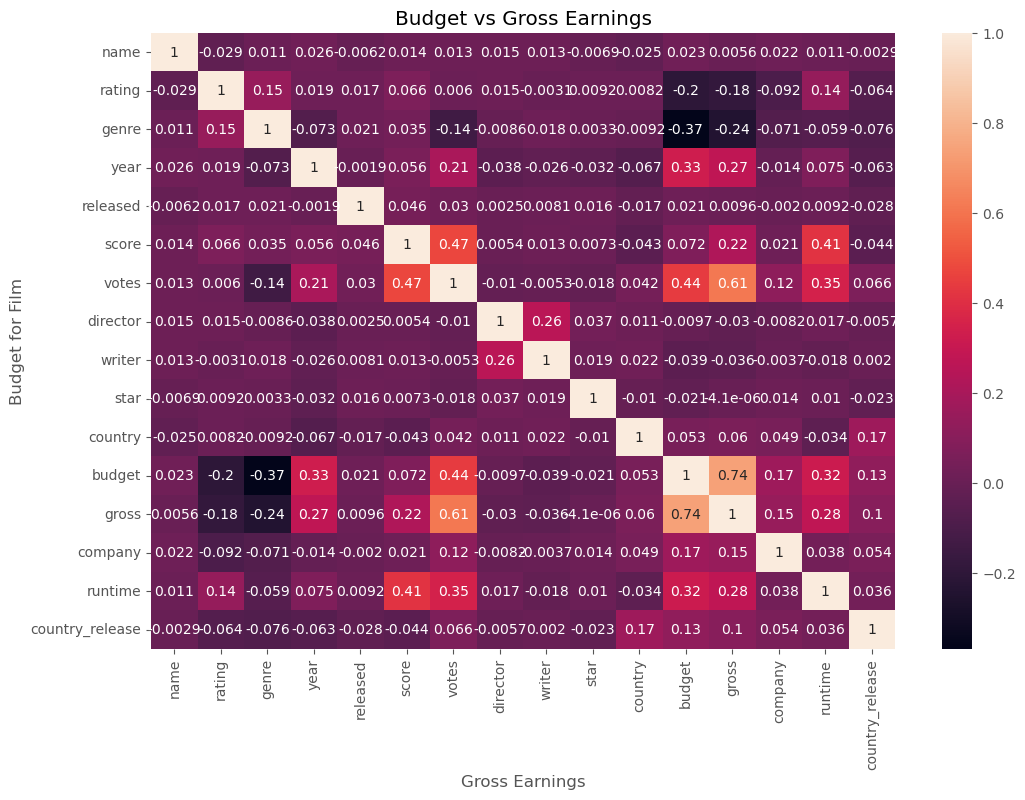

In [33]:
correlation_matrix = df_stringtoint.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')

plt.show

In [37]:
correlation_mat = df_stringtoint.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name             name               1.000000
                 rating            -0.029234
                 genre              0.010996
                 year               0.025542
                 released          -0.006155
                 score              0.014450
                 votes              0.012615
                 director           0.015246
                 writer             0.012880
                 star              -0.006882
                 country           -0.025490
                 budget             0.023392
                 gross              0.005639
                 company            0.021697
                 runtime            0.010850
                 country_release   -0.002908
rating           name              -0.029234
                 rating             1.000000
                 genre              0.147796
                 year               0.019499
                 released           0.017349
                 score              0.065983
          

In [39]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget           genre             -0.368523
genre            budget            -0.368523
                 gross             -0.244101
gross            genre             -0.244101
rating           budget            -0.203946
budget           rating            -0.203946
rating           gross             -0.181906
gross            rating            -0.181906
votes            genre             -0.135990
genre            votes             -0.135990
rating           company           -0.092357
company          rating            -0.092357
genre            country_release   -0.075552
country_release  genre             -0.075552
year             genre             -0.073167
genre            year              -0.073167
                 company           -0.071334
company          genre             -0.071334
year             country           -0.066748
country          year              -0.066748
country_release  rating            -0.063883
rating           country_release   -0.063883
country_re

In [40]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes            gross              0.614751
gross            votes              0.614751
                 budget             0.740247
budget           gross              0.740247
name             name               1.000000
company          company            1.000000
gross            gross              1.000000
budget           budget             1.000000
country          country            1.000000
star             star               1.000000
writer           writer             1.000000
director         director           1.000000
votes            votes              1.000000
score            score              1.000000
released         released           1.000000
year             year               1.000000
genre            genre              1.000000
rating           rating             1.000000
runtime          runtime            1.000000
country_release  country_release    1.000000
dtype: float64

In [ ]:
# votes and budget have the highest correlation to gross earnings